In [23]:
from skimage import io, filters, measure, morphology, exposure
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from skimage.exposure import histogram
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_doh,blob_dog, canny
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

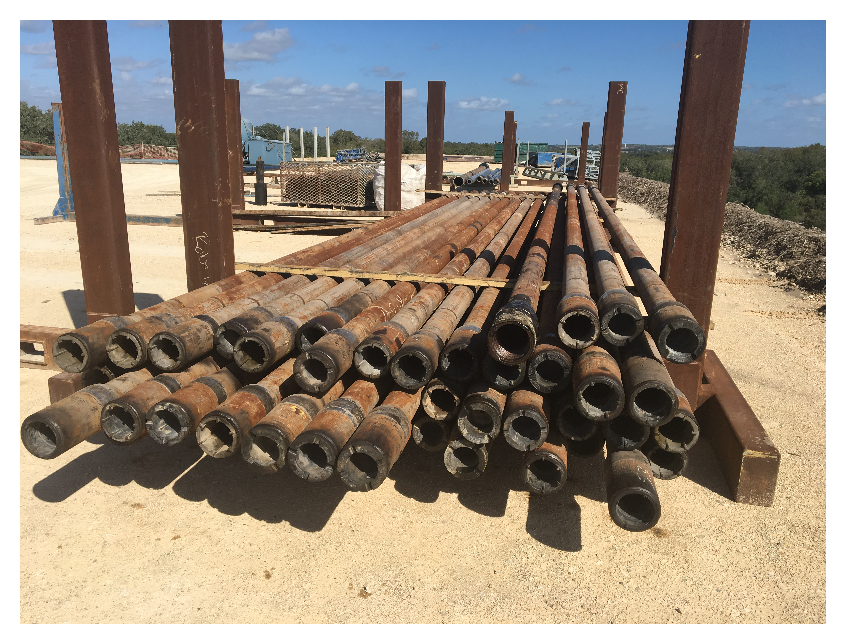

In [2]:
img_path = '../images/IMG_0648.JPG'
img_rgb = io.imread(img_path)

fig_rgb = plt.figure(dpi=200)
ax_rgb = fig_rgb.add_subplot(1, 1, 1)
ax_rgb.axis('off')
ax_rgb.imshow(img_rgb)
plt.show()

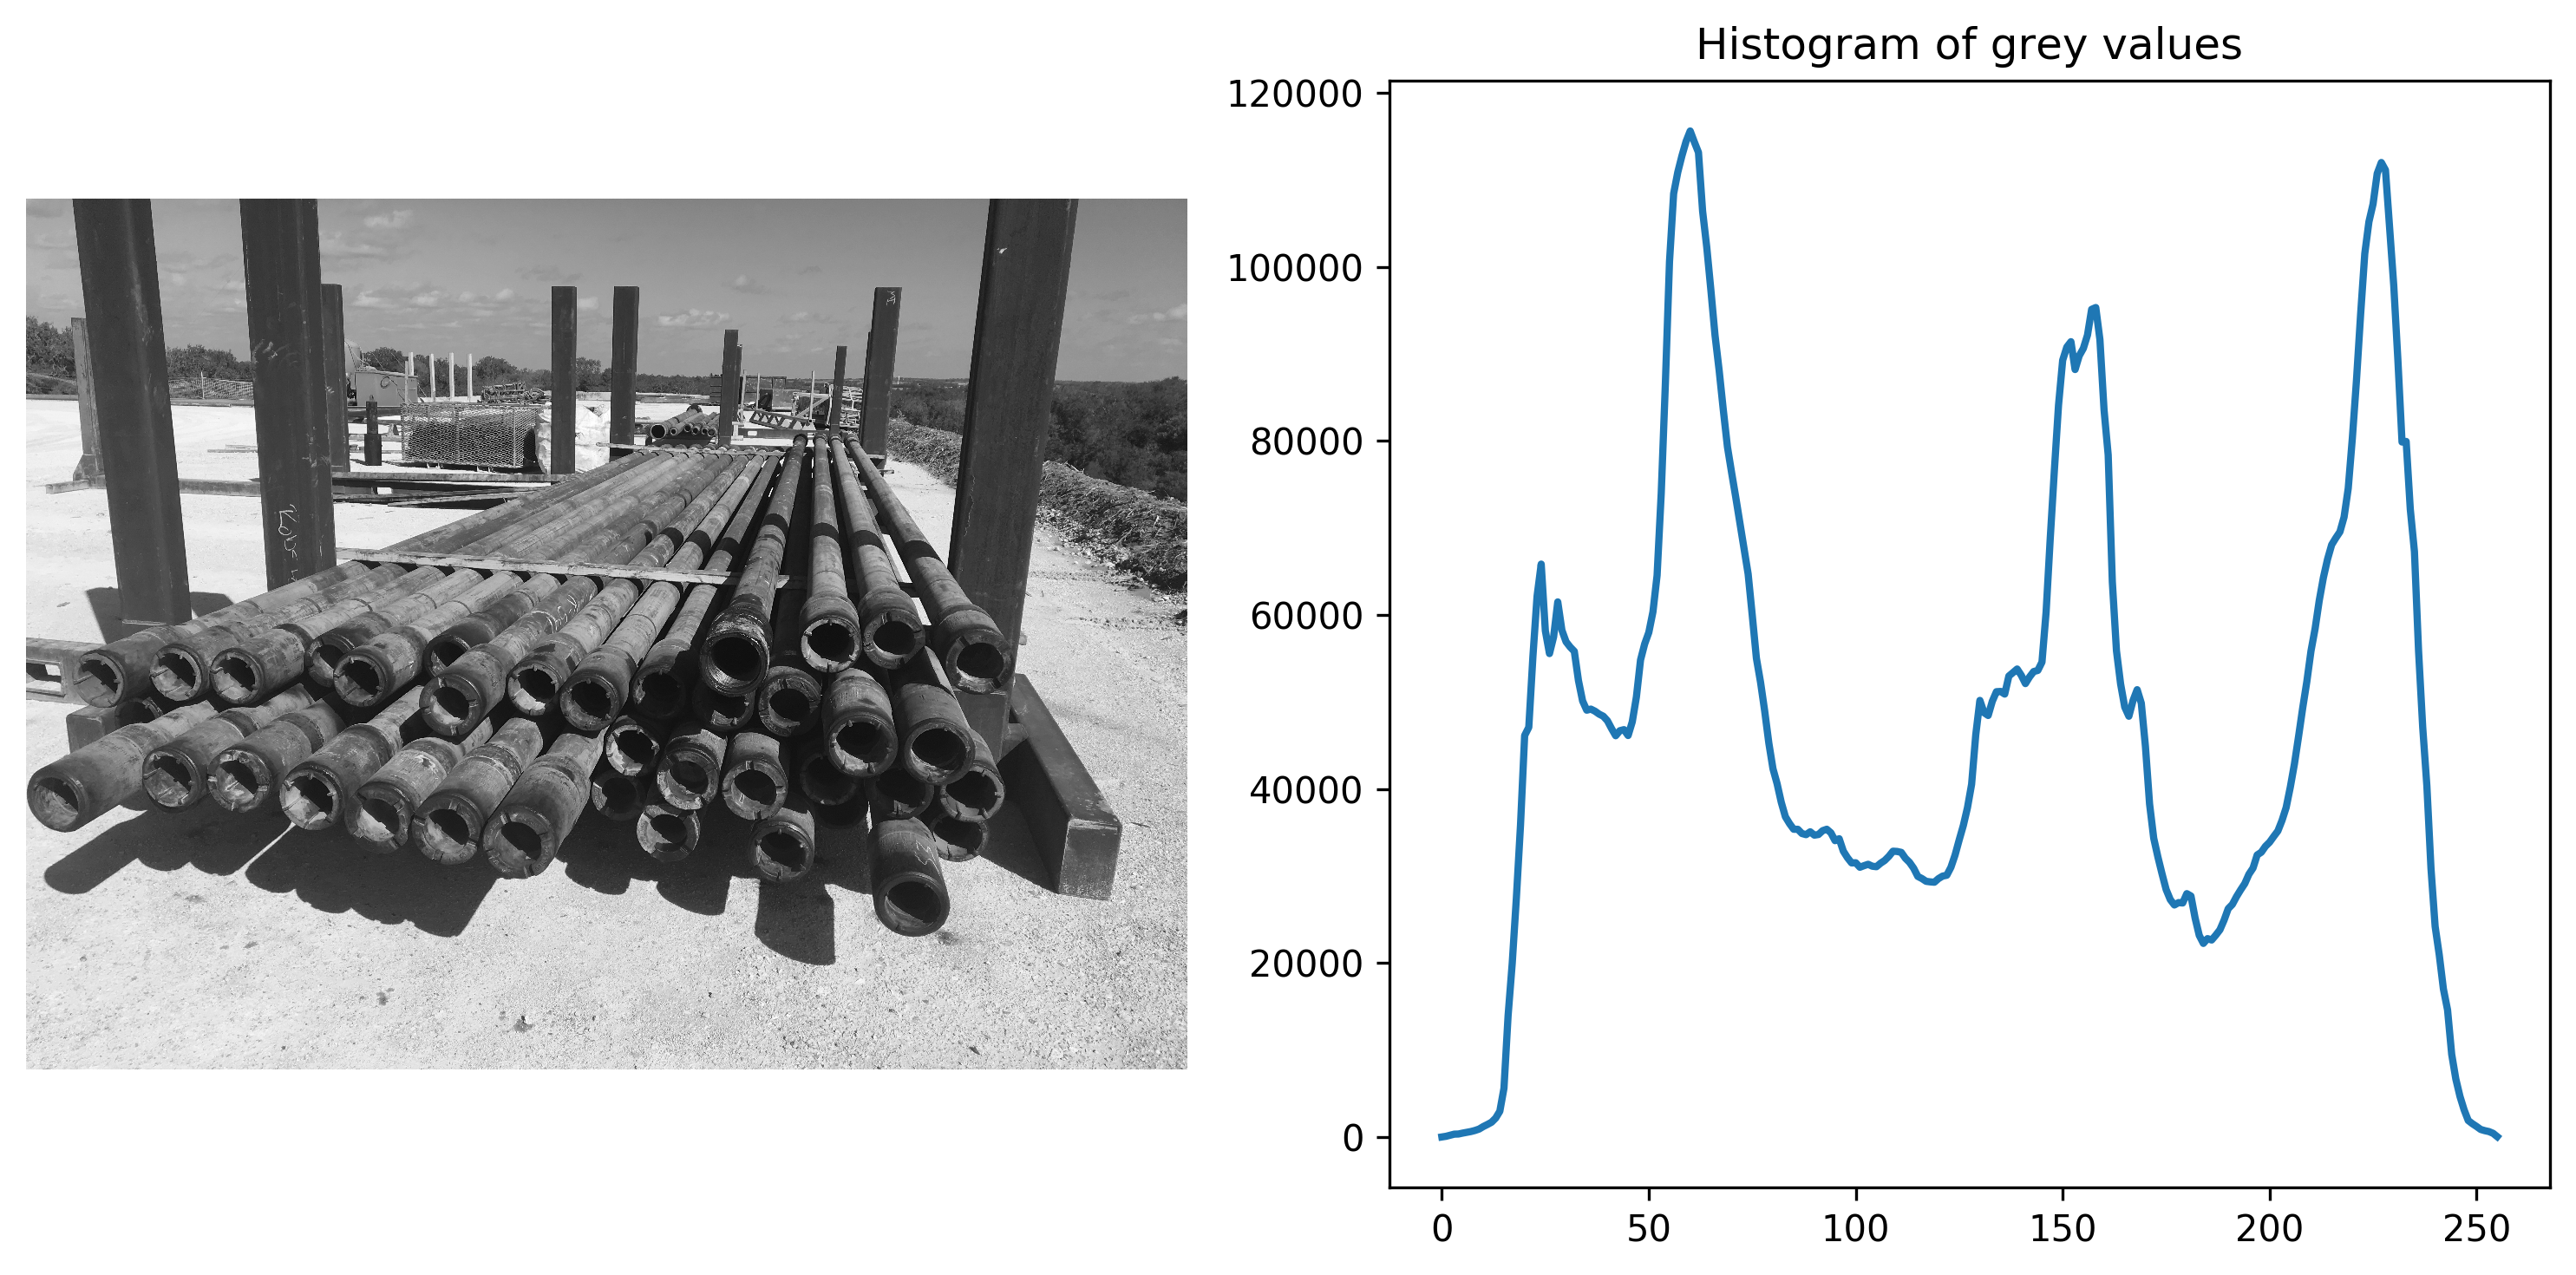

In [3]:
img_gray = rgb2gray(img_rgb)

img_gray_ubyte = img_as_ubyte(img_gray)
hist, hist_centers = histogram(img_gray_ubyte)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(img_gray_ubyte, cmap=plt.cm.gray)
ax[0].axis('off')

ax[1].plot(hist_centers, hist, lw=2)
ax[1].set_title('Histogram of grey values')

fig.set_dpi(300)
plt.tight_layout()

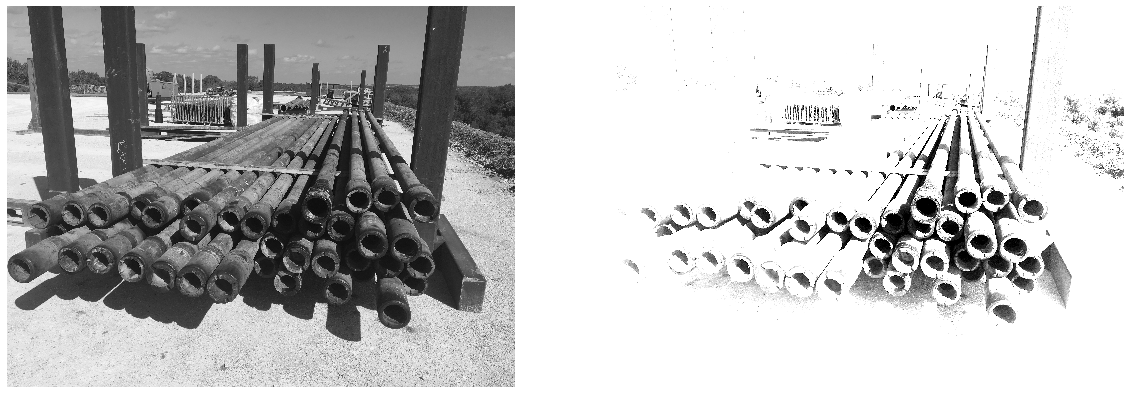

In [4]:
# Contrast stretching
p_start, p_end = np.percentile(img_gray, (1, 15))
img_rescale = exposure.rescale_intensity(img_gray, in_range=(p_start, p_end))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.imshow(img_gray, cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(img_rescale, cmap=plt.cm.gray)
ax2.axis('off')
plt.show()

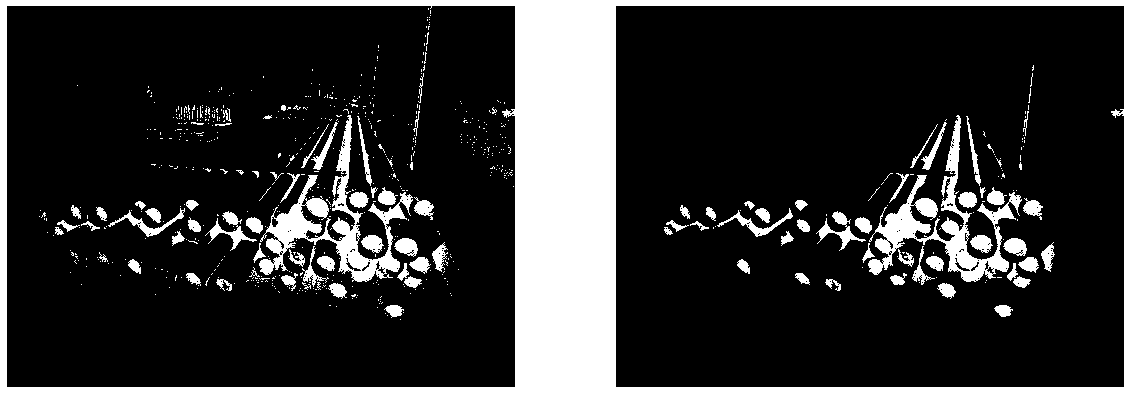

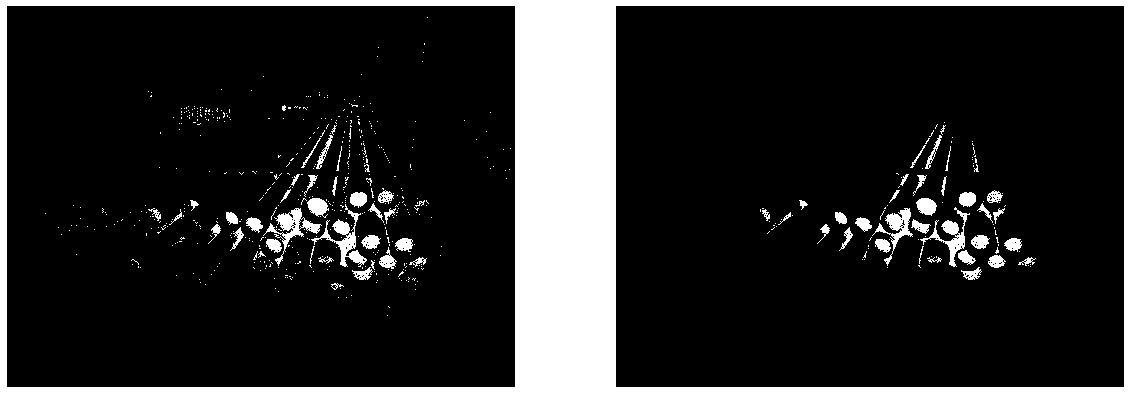

In [5]:
binary_ceiling = 0.25 * filters.threshold_mean(img_gray)
img_binary_dirty = img_gray < binary_ceiling
img_binary = morphology.remove_small_objects(img_binary_dirty, 2100)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.imshow(img_binary_dirty, cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(img_binary, cmap=plt.cm.gray)
ax2.axis('off')
plt.show()

binary_ceiling = 0.25 * filters.threshold_mean(img_gray)
img_binary_dirty = img_rescale < binary_ceiling
img_binary = morphology.remove_small_objects(img_binary_dirty, 2100)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
ax1.imshow(img_binary_dirty, cmap=plt.cm.gray)
ax1.axis('off')
ax2.imshow(img_binary, cmap=plt.cm.gray)
ax2.axis('off')
plt.show()


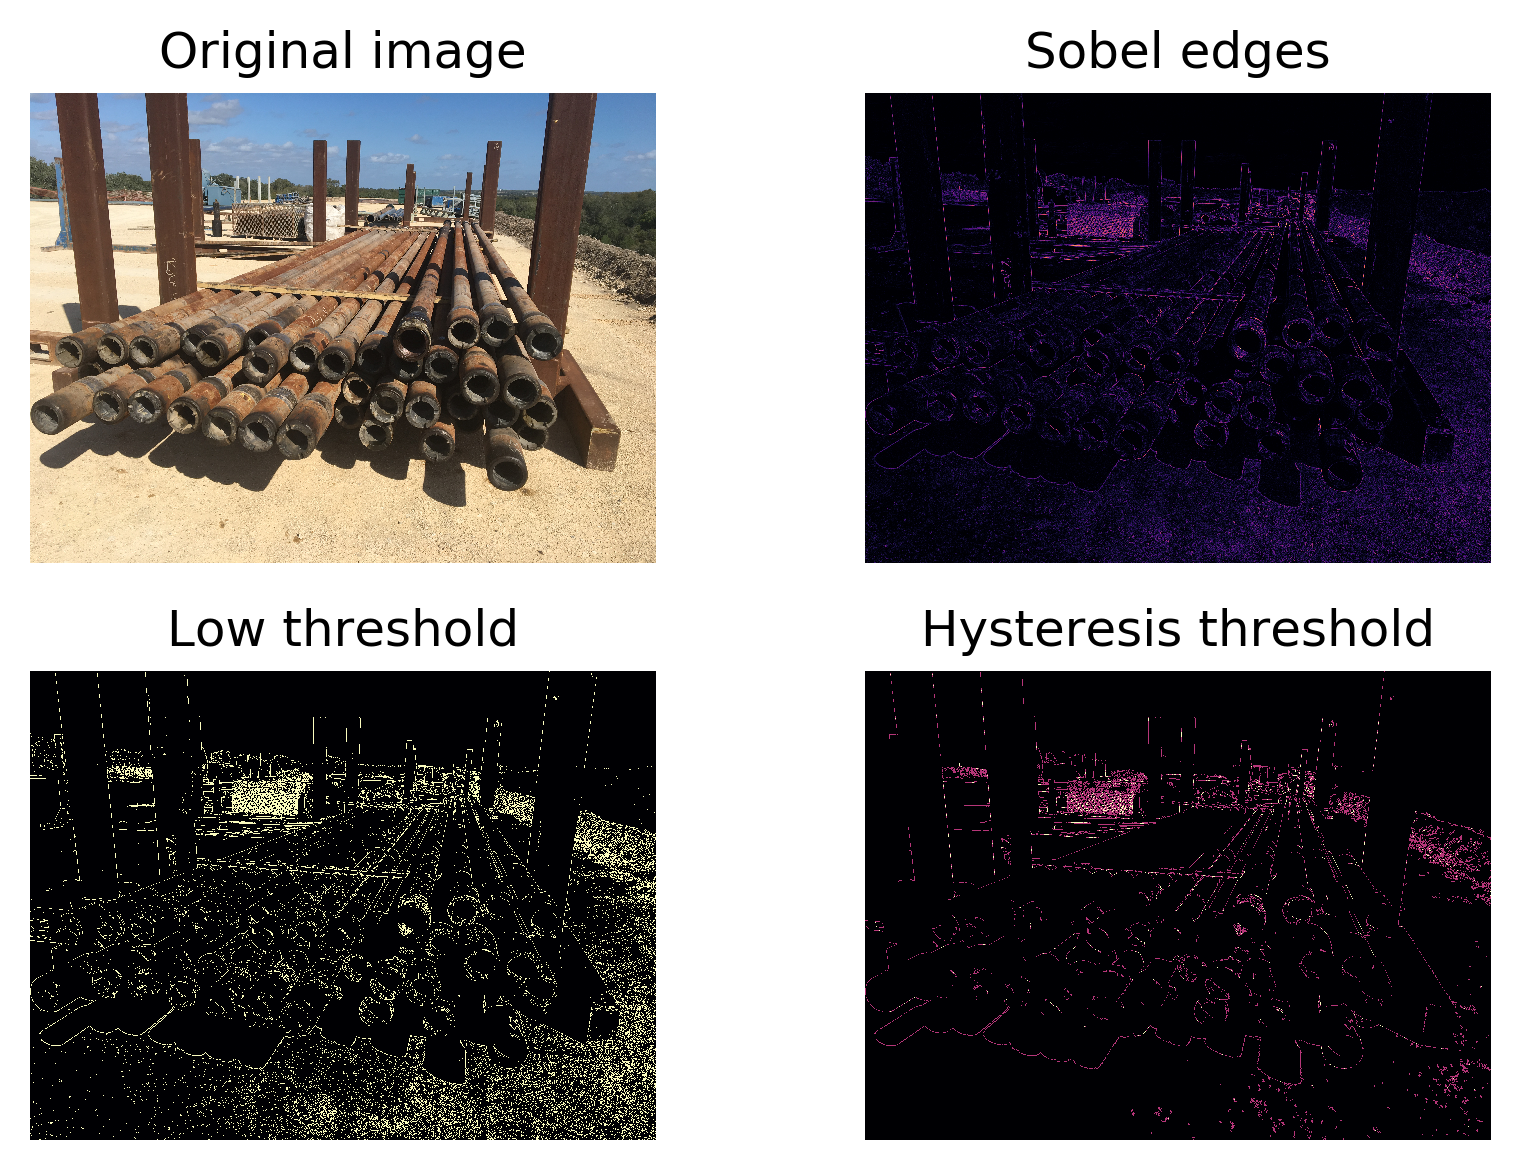

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_dpi(300)

edges = filters.sobel(img_gray)

low = 0.1
high = 0.35

lowt = (edges > low).astype(int)
hight = (edges > high).astype(int)
hyst = filters.apply_hysteresis_threshold(edges, low, high)

ax[0, 0].imshow(img_rgb)
ax[0, 0].set_title('Original image')

ax[0, 1].imshow(edges, cmap='magma')
ax[0, 1].set_title('Sobel edges')

ax[1, 0].imshow(lowt, cmap='magma')
ax[1, 0].set_title('Low threshold')

ax[1, 1].imshow(hight + hyst, cmap='magma')
ax[1, 1].set_title('Hysteresis threshold')

for a in ax.ravel():
    a.axis('off')

plt.tight_layout()

plt.show()

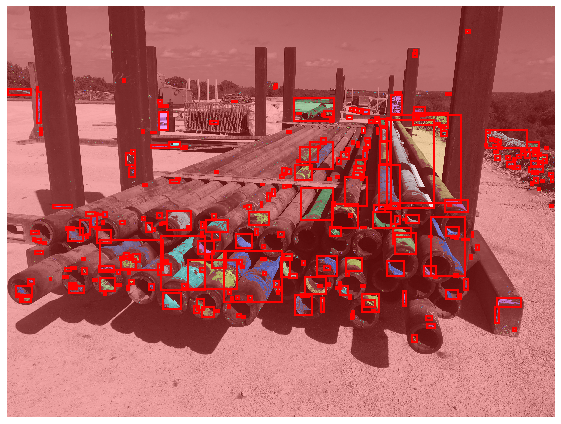

In [7]:
image = img_gray

# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

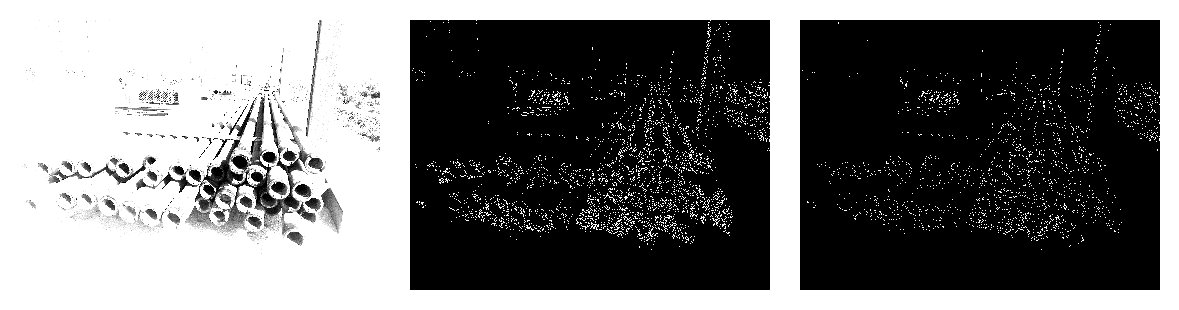

In [8]:
# Compute the Canny filter for two values of sigma
edges1 = canny(img_rescale)
edges2 = canny(img_rescale, sigma=2)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
fig.set_dpi(200)

ax1.imshow(img_rescale, cmap=plt.cm.gray)
ax1.axis('off')

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')

fig.tight_layout()

plt.show()

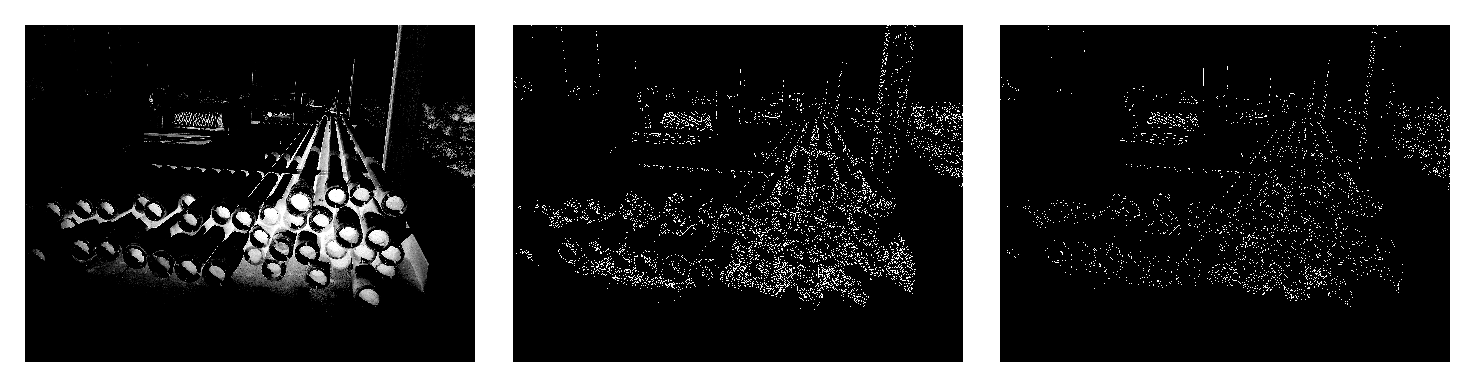

In [9]:
# invert image
from skimage import util
img_gray_inverted = util.invert(img_rescale)

# Compute the Canny filter for two values of sigma
edges1 = canny(img_gray_inverted)
edges2 = canny(img_gray_inverted, sigma=2)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
fig.set_dpi(250)

ax1.imshow(img_gray_inverted, cmap=plt.cm.gray)
ax1.axis('off')

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')

fig.tight_layout()

plt.show()


In [ ]:
doh_blobs = blob_doh(img_gray_inverted, max_sigma=150, min_sigma=45, threshold=0.01, overlap=0.01)

In [24]:
dog_blobs = blob_dog(img_gray_inverted, max_sigma=150, min_sigma=45, threshold=0.01, overlap=0.01)

/Users/randypitcherii/.local/share/virtualenvs/cv-0CxmsRDD/lib/python3.7/site-packages/skimage/feature/blob.py:126: RuntimeWarning: invalid value encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/Users/randypitcherii/.local/share/virtualenvs/cv-0CxmsRDD/lib/python3.7/site-packages/skimage/feature/blob.py:127: RuntimeWarning: invalid value encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)


NameError: name 'doh_blobs' is not defined

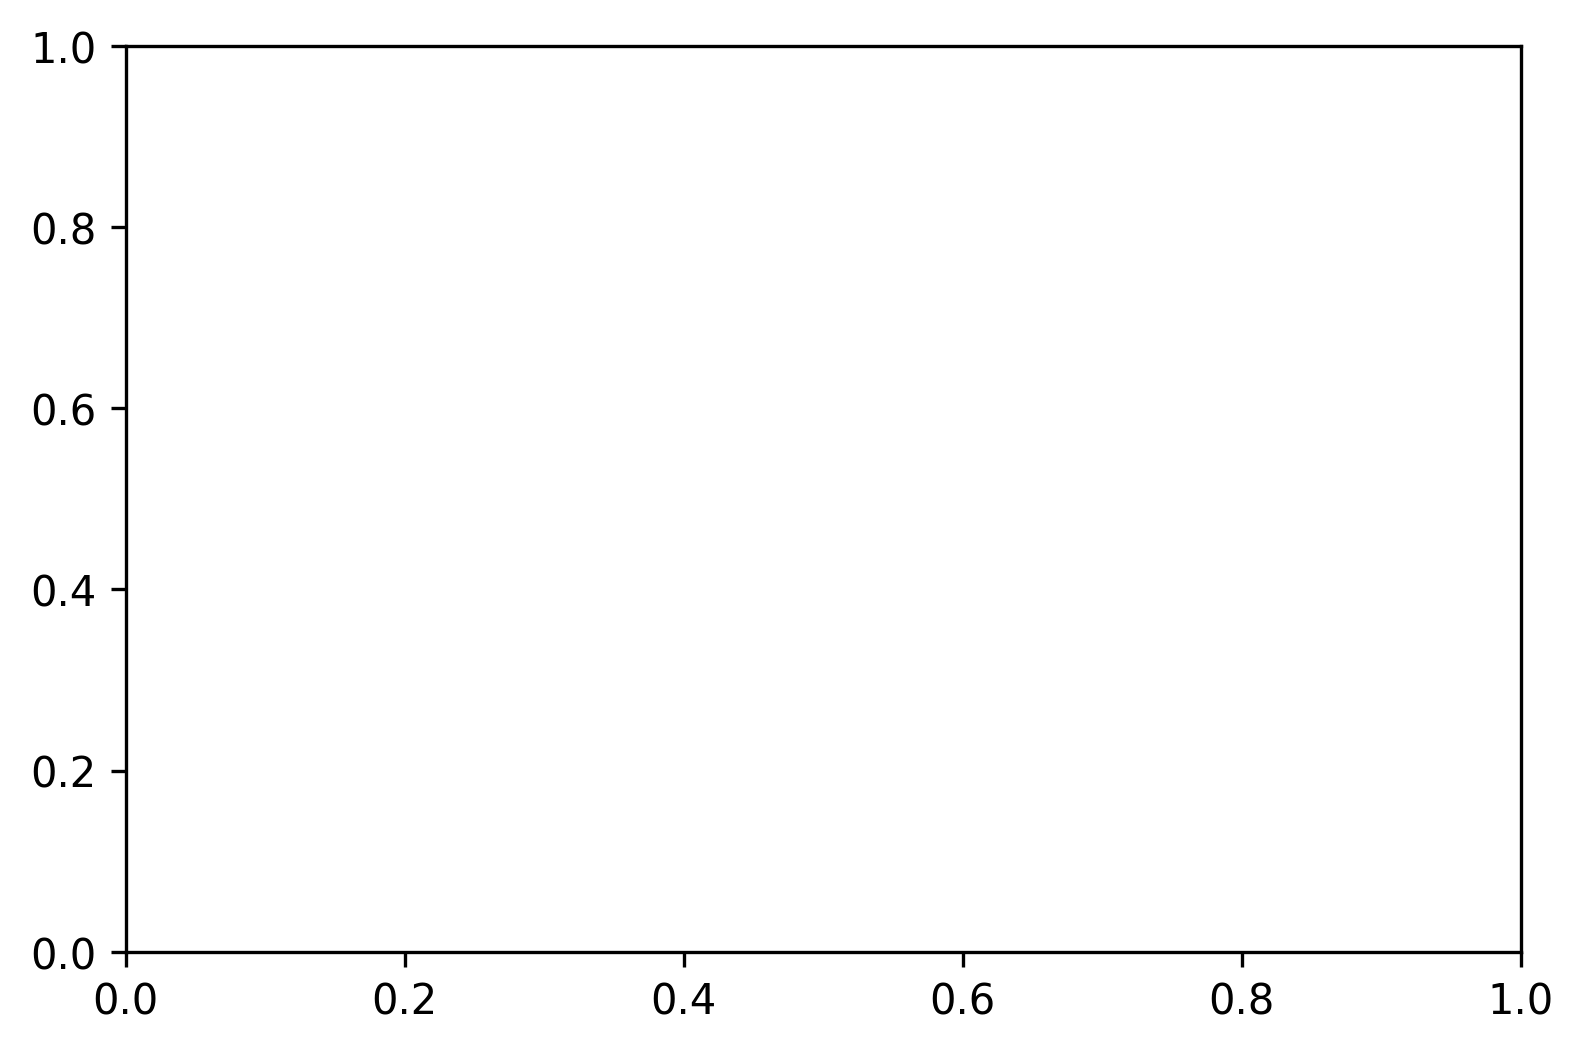

In [26]:
fig = plt.figure(dpi=300)
ax = fig.add_subplot(1, 1, 1)

blobs = doh_blobs
ax.imshow(img_rgb)
for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)
ax.set_axis_off()


print(f"Found {len(blobs)} pipes. About 36 are present")
plt.show()